In [1]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import shutil

data_dir = "/vol/biomedic3/bglocker/radiotherapy/kat100/nifti"

In [3]:
sample_names = sorted(os.listdir(data_dir))
train_set = sample_names[:80]
test_set = sample_names[81:]
print(train_set)
print(test_set)

['zzAMLART001', 'zzAMLART002', 'zzAMLART003', 'zzAMLART004', 'zzAMLART005', 'zzAMLART006', 'zzAMLART007', 'zzAMLART008', 'zzAMLART009', 'zzAMLART010', 'zzAMLART011', 'zzAMLART012', 'zzAMLART013', 'zzAMLART014', 'zzAMLART015', 'zzAMLART016', 'zzAMLART017', 'zzAMLART018', 'zzAMLART019', 'zzAMLART020', 'zzAMLART021', 'zzAMLART022', 'zzAMLART023', 'zzAMLART024', 'zzAMLART025', 'zzAMLART026', 'zzAMLART027', 'zzAMLART028', 'zzAMLART029', 'zzAMLART030', 'zzAMLART031', 'zzAMLART032', 'zzAMLART033', 'zzAMLART034', 'zzAMLART035', 'zzAMLART036', 'zzAMLART037', 'zzAMLART038', 'zzAMLART039', 'zzAMLART040', 'zzAMLART041', 'zzAMLART042', 'zzAMLART043', 'zzAMLART044', 'zzAMLART045', 'zzAMLART046', 'zzAMLART047', 'zzAMLART048', 'zzAMLART049', 'zzAMLART050', 'zzAMLART051', 'zzAMLART052', 'zzAMLART053', 'zzAMLART054', 'zzAMLART055', 'zzAMLART056', 'zzAMLART057', 'zzAMLART058', 'zzAMLART059', 'zzAMLART060', 'zzAMLART061', 'zzAMLART062', 'zzAMLART063', 'zzAMLART064', 'zzAMLART065', 'zzAMLART066', 'zzAMLART

In [10]:
def find_global_min_max():
    global_min = np.inf
    global_max = -np.inf

    global_max_name = ""

    greater_3000 = []
    greater_4000 = []
    greater_10000 = []

    

    for patient_name in os.listdir(data_dir):
        patient_path = os.path.join(data_dir, patient_name)
        image_path = os.path.join(patient_path, "image.nii.gz")

        image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayViewFromImage(image)
        min_val = np.min(image_array)
        max_val = np.max(image_array)
        print(patient_name)
        #print("min", min_val)
        print("max", max_val)
        print("\n")

        if(3000 < max_val < 4000):
            greater_3000.append(patient_name)
        elif(4000 < max_val < 10000):
            greater_4000.append(patient_name)
        elif(max_val > 10000):
            greater_10000.append(patient_name)


        if (max_val > global_max):
            global_max_name = patient_name
        global_max = np.maximum(global_max, max_val)
        global_min = np.minimum(global_min, min_val)

        

    print("Max 3000-4000", greater_3000)
    print("Max 4000-10000", greater_4000)
    print("Max 10000+", greater_10000)

    print("Global max name", global_max_name)
    print(global_max)
    print(global_min)

find_global_min_max()
        

    

zzAMLART027
max 9570


zzAMLART050
max 2600


zzAMLART068
max 3067


zzAMLART086
max 3043


zzAMLART062
max 22975


zzAMLART015
max 4205


zzAMLART034
max 2758


zzAMLART043
max 3071


zzAMLART049
max 2938


zzAMLART071
max 2368


zzAMLART006
max 13618


zzAMLART095
max 3055


zzAMLART001
max 3054


zzAMLART076
max 2950


zzAMLART098
max 4125


zzAMLART092
max 18347


zzAMLART044
max 3071


zzAMLART033
max 3005


zzAMLART039
max 3071


zzAMLART081
max 3047


zzAMLART018
max 3985


zzAMLART012
max 3134


zzAMLART065
max 3068


zzAMLART057
max 2357


zzAMLART020
max 3768


zzAMLART053
max 4611


zzAMLART024
max 2851


zzAMLART059
max 29014


zzAMLART016
max 5717


zzAMLART061
max 6002


zzAMLART085
max 3071


zzAMLART040
max 3071


zzAMLART037
max 3071


zzAMLART096
max 4565


zzAMLART078
max 3064


zzAMLART005
max 3144


zzAMLART072
max 18951


zzAMLART008
max 3766


zzAMLART091
max 3069


zzAMLART075
max 3140


zzAMLART002
max 3060


zzAMLART030
max 9071


zzAMLART047
max 3069


zzAMLA

In [17]:

def find_image_size(dir):
    for patient_name in os.listdir(dir):
        patient_path = os.path.join(dir, patient_name)
        image_path = os.path.join(patient_path, "image.nii.gz")

        image = sitk.ReadImage(image_path)
        size = image.GetSize()
        print(size)

find_image_size("/vol/bitbucket/djk18/dataset/downsample_2m_isotropic/")
#find_image_size("/vol/bitbucket/djk18/ssn/ssn_preprocessed/Task4/")

(325, 325, 239)
(250, 250, 331)
(250, 250, 219)
(325, 325, 234)
(250, 250, 176)
(250, 250, 249)
(250, 250, 247)
(275, 275, 236)
(250, 250, 212)
(250, 250, 272)
(275, 275, 294)
(325, 325, 200)


KeyboardInterrupt: 

In [3]:

# Use the funciton in eval instead
# Convert label map back to multiple bitmap files for use with SNNs
ssn_dir = '/homes/djk18/Anatomical_contouring/stochastic_segmentation_networks'

def get_test_infrance_dir(network_name):
    return os.path.join(ssn_dir + "/jobs/" + network_name + "/test/predictions")
    
def labels_to_masks(network_name, patient=None):
    patient_list = []
    if patient:
      patient_list = [patient]
    else:
      patient_list = test_set
    
    for patient in patient_list:
       test_infrance_dir = get_test_infrance_dir(network_name)
       label_map_path = os.path.join(test_infrance_dir, patient + "_prediction.nii.gz")

       label_map = nib.load(label_map_path)
       label_map_header = label_map.header.copy()
       label_map_arr = np.array(label_map.dataobj)
       labels = np.unique(label_map_arr)

       for i in labels:
           if (int(i) != 0):
            bit_map = np.zeros(label_map_arr.shape, dtype=np.dtype('u1'))
            bit_map[label_map_arr != 0] = int(i)
            ni_img = nib.Nifti1Image(bit_map, None, header=label_map_header)
            nib.save(ni_img, os.path.join(test_infrance_dir, patient + "_" + i + ".nii.gz"))

#labels_to_masks("rank_10_mc_20_patch_110_cervical")
       

/vol/bitbucket/djk18/cervical_Task16_1050/test/predictions/zzAMLART081_prediction.nii.gz
(250, 250, 250)
(2.0, 2.0, 2.0)
0.0
3.0
0.008852608
(250, 250, 250)


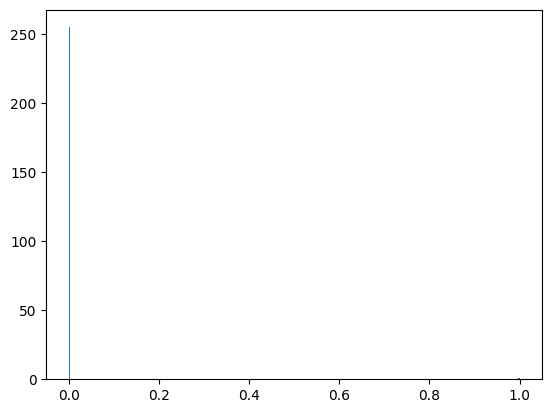

In [7]:
# Code to check / display CT images
def display_img(img_path):
    print(img_path)
    img = sitk.ReadImage(img_path) 
    # for key in img.GetMetaDataKeys():
    #     print(key + " : " + img.GetMetaData(key))

    print(img.GetSize())
    print(img.GetSpacing())
    img_array = sitk.GetArrayFromImage(img) # Convert the SimpleITK image to a NumPy array

    print(np.min(img_array))
    print(np.max(img_array))
    print(np.mean(img_array))
    print(img_array.shape)
   # plt.imshow(img_array[150,:,:], cmap='gray')
    #plt.hist(img_array.flatten(), bins=256, density=True)
    plt.hist(img_array.flatten()[np.logical_and(img_array.flatten() > -1 ,img_array.flatten() < 1)], bins=256, density=True)
   # plt.show()
    
#display_img("/vol/bitbucket/djk18/rank_10_mc_20_patch_110_cervical/test/predictions/zzAMLART081_prediction.nii.gz")
#display_img("/vol/bitbucket/djk18/rank_10_mc_20_patch_110_cervical/test/upsampled_predictions/zzAMLART081_prediction.nii.gz")
#display_img("/vol/biomedic3/bglocker/radiotherapy/kat100/nifti/zzAMLART081/image.nii.gz")
#display_img("/vol/bitbucket/djk18/dataset/downsample_2m_isotropic/zzAMLART001/image.nii.gz")
#display_img("/vol/bitbucket/djk18/dataset/downsample_2m_isotropic/zzAMLART001/mask_Anorectum.nii.gz")

#display_img("/vol/bitbucket/djk18/dataset/downsample_2m_isotropic/zzAMLART070/mask_FemoralHead_R.nii.gz")
#display_img("/vol/bitbucket/djk18/nnUnet_models/nnUNet_raw_data/Dataset504/labelsTr/zzAMLART001.nii.gz")
# display_img("/vol/bitbucket/djk18/ssn/ssn_preprocessed/Task3/zzAMLART083_CT.nii.gz")

#display_img("/vol/bitbucket/djk18/ssn/ssn_preprocessed/Task60/zzAMLART054_CT.nii.gz")
display_img("/vol/bitbucket/djk18/cervical_Task16_1050/test/predictions/zzAMLART081_prediction.nii.gz")

In [ ]:
patient_name = "zzAMLART001"
image_name = "image"
print(os.listdir(data_dir + "/" + patient_name))

['mask_Cervix.nii.gz', 'mask_Vagina-for-CTV.nii.gz', 'mask_Duodenum.nii.gz', 'mask_BODY.nii.gz', 'mask_Pelvic-floor.nii.gz', 'mask_LN-Pelvic-nodes.nii.gz', 'mask_Anorectum.nii.gz', 'mask_Bowel-loops.nii.gz', 'mask_Parametrium-and-Paravagina-for-CTV.nii.gz', 'mask_Bones.nii.gz', 'mask_Bowel-Sigmoid.nii.gz', 'mask_Ovary_L.nii.gz', 'mask_GTVn.nii.gz', 'mask_Kidney_L.nii.gz', 'mask_LN-Para-aortic.nii.gz', 'mask_Bladder.nii.gz', 'mask_Uterus.nii.gz', 'mask_CTVn.nii.gz', 'mask_CTV-HR.nii.gz', 'mask_FemoralHead_L.nii.gz', 'mask_SpinalCord-and-Cauda.nii.gz', 'mask_Vagina-whole.nii.gz', 'mask_Bowel-bag.nii.gz', 'mask_Kidney_R.nii.gz', 'mask_LN-Common-Iliacs.nii.gz', 'mask_GTVp.nii.gz', 'mask_Ovary_R.nii.gz', 'image.nii.gz', 'mask_FemoralHead_R.nii.gz', 'mask_CTVp.nii.gz', 'mask_CTV-corrected.nii.gz', 'mask_CTV-automatic.nii.gz', 'mask_Parametrium-and-paravagina-whole.nii.gz']


In [ ]:
image_path = data_dir + "/" + patient_name +"/" + image_name + ".nii.gz"
img = sitk.ReadImage(image_path) 

In [ ]:
print(img.GetSize())
print(img.GetSpacing())

(512, 512, 297)
(0.9765625, 0.9765625, 2.0)


In [2]:
img_array = sitk.GetArrayFromImage(img) # Convert the SimpleITK image to a NumPy array
print(img_array.shape)

NameError: name 'img' is not defined

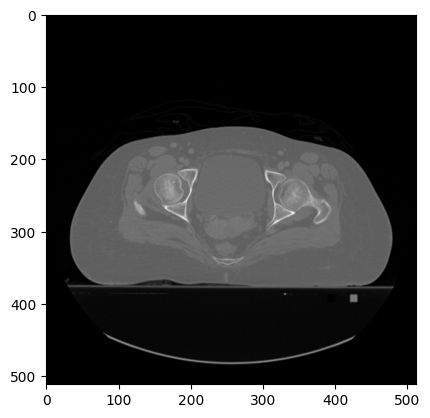

In [ ]:
plt.imshow(img_array[100,:,:], cmap='gray')

In [5]:
def create_folder_structure(task_path):
  isExist = os.path.exists(task_path)
  if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(task_path)
   os.makedirs(task_path + "/imagesTr")
   os.makedirs(task_path + "/imagesTs")
   os.makedirs(task_path + "/labelsTr")
   print("The new directory is created!")

In [15]:
import numpy as np
import nibabel as nib
import os
import shutil

def create_dataset_overlapping():
    # nnUnet/nnUNet_raw_data/Task500_Bones/
    target_base = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_raw_data/"
    task_name = "Dataset503_CTVp/" #"Task501_CTVp_CTVn/" #"Task500_Bones/"
    create_folder_structure(target_base + task_name)
    #suffix = "_0000.nii.gz"
    n = 0

    #masks = ["Bones", "FemoralHead_L", "FemoralHead_R", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
    masks = ["Bladder", "Anorectum", "CTVp", "CTVn", "Parametrium-and-Paravagina-for-CTV"]
    used_labels = np.arange(1, len(masks) + 1)
    print("used_labels", used_labels)
    
    for patient_name in os.listdir(data_dir):
        patient_path = data_dir + "/" + patient_name

        image_path = patient_path + "/" + "image.nii.gz"

      
        labels = {}
        label_map = None
        region_size = {}


        if (n < 70):
            for (i,mask) in enumerate(masks):
                mask_path = data_dir + "/"+ patient_name + "/mask_" + mask + ".nii.gz"
                
                img = nib.load(mask_path)
                img_array = np.array(img.dataobj)
                if label_map is None:
                    img_header = img.header.copy()
                    label_map = np.zeros(img_array.shape, dtype=np.uint16)
                


                
            
                # Handle overlapping regions by assigning unique labels
                mask_idx = (img_array != 0)
                overlap_idx = np.logical_and(label_map != 0, mask_idx)
                overlap_labels = label_map[overlap_idx]

                # Get unique labels that are not 0
                unique_labels = np.setdiff1d(np.unique(overlap_labels), 0)

                # Populate label and region size dictionaries dictiories
                labels[str(i + 1)] = mask
                region_size[str(i + 1)] = labels[str(i + 1)] + " size : " + str(len(label_map[mask_idx]))

                # Handle overlaps
                if len(unique_labels) > 1 and (not overlap_idx.all()):
                    for overlap_label in unique_labels:
                        
                        
                        new_label = used_labels[-1] + 1
                       
                        used_labels = np.append(used_labels, int(new_label))
                       
                        # Assigns new label to the region which overlaps between the mask and a specific label
                    
                        overlap_idx_label = np.logical_and(label_map == overlap_label, overlap_idx)
                        #print(np.where(overlap_idx_label == True))
                        label_map[mask_idx & overlap_idx_label] = new_label

                        # print("mask size", len(label_map[mask_idx]))
                        # print("label size", len(label_map[label_map == new_label]))
                        # Store label meaning in map
            
                        # print(str(i) + ", " + str(overlap_label))
                        labels[str(new_label)] = "[" + labels[str(i + 1)].strip("[]") + ", " + labels[str(overlap_label)].strip("[]") + "]"
                        region_size[str(new_label)] = labels[str(new_label)] + " Size : " + str(len(label_map[label_map == new_label]))

                label_map[mask_idx & ~overlap_idx] = i+1

           
            #print(label_map[label_map > 0])
            # for key in sorted(labels, key=lambda k: int(k)):
            #     print(key, labels[key])

            for key in sorted(region_size, key=lambda k: int(k)):
                print(key, region_size[key])
            # print(labels)
            # print(region_size)
           
            # ni_img = nib.Nifti1Image(label_map, None, header=img_header)

            # shutil.copyfile(image_path, target_base + task_name + "imagesTr/" + patient_name + "_0000.nii.gz")
            # nib.save(ni_img, target_base + task_name + "labelsTr/" + patient_name + ".nii.gz")
            # print(label_map[label_map != 0][0])
            
                
        else:
            pass
            # shutil.copyfile(image_path, target_base + task_name + "imagesTs/" + patient_name + "_0000.nii.gz")

        n += 70

create_dataset_overlapping()

used_labels [1 2 3 4 5]
1 Bladder
2 Anorectum
3 CTVp
4 CTVn
5 Parametrium-and-Paravagina-for-CTV
6 [CTVp, Bladder]
7 [CTVp, Anorectum]
8 [CTVn, Bladder]
9 [CTVn, CTVp]
10 [Parametrium-and-Paravagina-for-CTV, Bladder]
11 [Parametrium-and-Paravagina-for-CTV, Anorectum]
12 [Parametrium-and-Paravagina-for-CTV, CTVp]
13 [Parametrium-and-Paravagina-for-CTV, CTVn]
14 [Parametrium-and-Paravagina-for-CTV, CTVp, Bladder]
15 [Parametrium-and-Paravagina-for-CTV, CTVp, Anorectum]
16 [Parametrium-and-Paravagina-for-CTV, CTVn, Bladder]
17 [Parametrium-and-Paravagina-for-CTV, CTVn, CTVp]
1 Bladdersize : 204880
2 Anorectumsize : 29806
3 CTVpsize : 90764
4 CTVnsize : 259067
5 Parametrium-and-Paravagina-for-CTVsize : 170747
6 [CTVp, Bladder] Size : 11
7 [CTVp, Anorectum] Size : 2
8 [CTVn, Bladder] Size : 1119
9 [CTVn, CTVp] Size : 107
10 [Parametrium-and-Paravagina-for-CTV, Bladder] Size : 106
11 [Parametrium-and-Paravagina-for-CTV, Anorectum] Size : 5
12 [Parametrium-and-Paravagina-for-CTV, CTVp] Size :

In [ ]:
# @np.vectorize
# def f(x, y):
#     if x == 0:
#         return 2*y
#     else:
#         return x + 2*y 
    
# Create NN-Unet data set
def create_dataset():
    # nnUnet/nnUNet_raw_data/Task500_Bones/
    target_base = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_raw_data/"
    task_name = "Dataset502_CTVp/" #"Task501_CTVp_CTVn/" #"Task500_Bones/"
    create_folder_structure(target_base + task_name)
    #suffix = "_0000.nii.gz"
    n = 0
    for patient_name in os.listdir(data_dir):
        patient_path = data_dir + "/" + patient_name

        image_path = patient_path + "/" + "image.nii.gz"

        masks = ["Bones", "FemoralHead_L", "FemoralHead_R", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
        labels = {}

    
    #     img = sitk.ReadImage(bones) 
    #     img_array = sitk.GetArrayFromImage(img)


        if (n < 70):
            label_map = np.array([], dtype=np.dtype('u1') )
            for (i,mask) in enumerate(masks):
                mask_path = data_dir + "/"+ patient_name + "/mask_" + mask + ".nii.gz"

                try:
                    img = nib.load(mask_path)
                    img_array = np.array(img.dataobj)
                    if(len(label_map) == 0):
                        img_header=img.header.copy()
                        label_map = np.zeros(img_array.shape, dtype=np.dtype('u1') )
                    


                    labels[str(i)] = mask
                
                    # Assumes no overlapping labels
                    #label_map[img_array != 0] = i
                    label_map[img_array != 0] = i+1 #(f)(label_map[img_array != 0], i)
                    
                except:
                    pass
            #print(label_map[label_map > 0])
            ni_img = nib.Nifti1Image(label_map, None, header=img_header)

            shutil.copyfile(image_path, target_base + task_name + "imagesTr/" + patient_name + "_0000.nii.gz")
            nib.save(ni_img, target_base + task_name + "labelsTr/" + patient_name + ".nii.gz")
            print(label_map[label_map != 0][0])
            
                
        else:
            shutil.copyfile(image_path, target_base + task_name + "imagesTs/" + patient_name + "_0000.nii.gz")

        n += 1

create_dataset()
# image_path = target_base + "/labelsTr/" + patient_name
# img = sitk.ReadImage(image_path)
# img_array = sitk.GetArrayFromImage(img)
# print(img_array[img_array != 0])
# #plt.imshow(img_array[100,:,:], cmap='gray')


AttributeError: module 'numpy' has no attribute 'u1'

In [ ]:
# Function to generate dataset JSON

from typing import Tuple
import numpy as np
from batchgenerators.utilities.file_and_folder_operations import *


def get_identifiers_from_splitted_files(folder: str):
    uniques = np.unique([i[:-12] for i in subfiles(folder, suffix='.nii.gz', join=False)])
    return uniques

def generate_dataset_json_old(output_file: str, imagesTr_dir: str, imagesTs_dir: str, modalities: Tuple,
                          labels: dict, dataset_name: str, sort_keys=True, license: str = "hands off!", dataset_description: str = "",
                          dataset_reference="", dataset_release='0.0'):
    """
    :param output_file: This needs to be the full path to the dataset.json you intend to write, so
    output_file='DATASET_PATH/dataset.json' where the folder DATASET_PATH points to is the one with the
    imagesTr and labelsTr subfolders
    :param imagesTr_dir: path to the imagesTr folder of that dataset
    :param imagesTs_dir: path to the imagesTs folder of that dataset. Can be None
    :param modalities: tuple of strings with modality names. must be in the same order as the images (first entry
    corresponds to _0000.nii.gz, etc). Example: ('T1', 'T2', 'FLAIR').
    :param labels: dict with int->str (key->value) mapping the label IDs to label names. Note that 0 is always
    supposed to be background! Example: {0: 'background', 1: 'edema', 2: 'enhancing tumor'}
    :param dataset_name: The name of the dataset. Can be anything you want
    :param sort_keys: In order to sort or not, the keys in dataset.json
    :param license:
    :param dataset_description:
    :param dataset_reference: website of the dataset, if available
    :param dataset_release:
    :return:
    """
    train_identifiers = get_identifiers_from_splitted_files(imagesTr_dir)

    if imagesTs_dir is not None:
        test_identifiers = get_identifiers_from_splitted_files(imagesTs_dir)
    else:
        test_identifiers = []

    json_dict = {}
    json_dict['name'] = dataset_name
    json_dict['description'] = dataset_description
    json_dict['tensorImageSize'] = "4D"
    json_dict['reference'] = dataset_reference
    json_dict['licence'] = license
    json_dict['release'] = dataset_release
    json_dict['modality'] = {str(i): modalities[i] for i in range(len(modalities))}
    json_dict['labels'] = {str(i): labels[i] for i in labels.keys()}

    json_dict['numTraining'] = len(train_identifiers)
    json_dict['numTest'] = len(test_identifiers)
    json_dict['training'] = [
        {'image': "./imagesTr/%s.nii.gz" % i, "label": "./labelsTr/%s.nii.gz" % i} for i
        in
        train_identifiers]
    json_dict['test'] = ["./imagesTs/%s.nii.gz" % i for i in test_identifiers]

    if not output_file.endswith("dataset.json"):
        print("WARNING: output file name is not dataset.json! This may be intentional or not. You decide. "
              "Proceeding anyways...")
    save_json(json_dict, os.path.join(output_file), sort_keys=sort_keys)

In [ ]:
from typing import Tuple

from batchgenerators.utilities.file_and_folder_operations import save_json, join


def generate_dataset_json(output_folder: str,
                          channel_names: dict,
                          labels: dict,
                          num_training_cases: int,
                          file_ending: str,
                          regions_class_order: Tuple[int, ...] = None,
                          dataset_name: str = None, reference: str = None, release: str = None, license: str = None,
                          description: str = None,
                          overwrite_image_reader_writer: str = None, **kwargs):
    """
    Generates a dataset.json file in the output folder
    channel_names:
        Channel names must map the index to the name of the channel, example:
        {
            0: 'T1',
            1: 'CT'
        }
        Note that the channel names may influence the normalization scheme!! Learn more in the documentation.
    labels:
        This will tell nnU-Net what labels to expect. Important: This will also determine whether you use region-based training or not.
        Example regular labels:
        {
            'background': 0,
            'left atrium': 1,
            'some other label': 2
        }
        Example region-based training:
        {
            'background': 0,
            'whole tumor': (1, 2, 3),
            'tumor core': (2, 3),
            'enhancing tumor': 3
        }
        Remember that nnU-Net expects consecutive values for labels! nnU-Net also expects 0 to be background!
    num_training_cases: is used to double check all cases are there!
    file_ending: needed for finding the files correctly. IMPORTANT! File endings must match between images and
    segmentations!
    dataset_name, reference, release, license, description: self-explanatory and not used by nnU-Net. Just for
    completeness and as a reminder that these would be great!
    overwrite_image_reader_writer: If you need a special IO class for your dataset you can derive it from
    BaseReaderWriter, place it into nnunet.imageio and reference it here by name
    kwargs: whatever you put here will be placed in the dataset.json as well
    """
    has_regions: bool = any([isinstance(i, (tuple, list)) and len(i) > 1 for i in labels.values()])
    if has_regions:
        assert regions_class_order is not None, f"You have defined regions but regions_class_order is not set. " \
                                                f"You need that."
    # channel names need strings as keys
    keys = list(channel_names.keys())
    for k in keys:
        if not isinstance(k, str):
            channel_names[str(k)] = channel_names[k]
            del channel_names[k]

    # labels need ints as values
    for l in labels.keys():
        value = labels[l]
        if isinstance(value, (tuple, list)):
            value = tuple([int(i) for i in value])
            labels[l] = value
        else:
            labels[l] = int(labels[l])

    dataset_json = {
        'channel_names': channel_names,  
        'labels': labels,
        'numTraining': num_training_cases,
        'file_ending': file_ending,
    }

    if dataset_name is not None:
        dataset_json['name'] = dataset_name
    if reference is not None:
        dataset_json['reference'] = reference
    if release is not None:
        dataset_json['release'] = release
    if license is not None:
        dataset_json['licence'] = license
    if description is not None:
        dataset_json['description'] = description
    if overwrite_image_reader_writer is not None:
        dataset_json['overwrite_image_reader_writer'] = overwrite_image_reader_writer
    if regions_class_order is not None:
        dataset_json['regions_class_order'] = regions_class_order

    dataset_json.update(kwargs)

    save_json(dataset_json, join(output_folder, 'dataset.json'), sort_keys=False)

In [ ]:
task_name = "Dataset502_CTVp" #Task502_CTVp" #'Task500_Bones'
target_base = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_raw_data/" + task_name
target_imagesTr = join(target_base, "imagesTr")
target_imagesTs = join(target_base, "imagesTs")
target_labelsTs = join(target_base, "labelsTs")
target_labelsTr = join(target_base, "labelsTr")

# What is modality?
#generate_dataset_json_old(join(target_base, 'dataset.json'), target_imagesTr, target_imagesTs, ('M'),
#                          labels={0: 'background', 1: "Bones", 2: "FemoralHead_L", 3: "FemoralHead_R", 4: "Bladder", 5: "Anorectum", 6: "Bowel-bag", 7: "Bowel-loops", 8: "CTVp"}, dataset_name=task_name, license='Academic use')
#, dataset_name=task_name, license='Academic use'
generate_dataset_json(target_base,
                        channel_names={0: 'CT'},
                        labels={
                              'background': 0,
                              'Bones': 1,
                              'FemoralHead_L': 2,
                              'FemoralHead_R': 3,
                              'Bladder': 4,
                              "Anorectum": 5, 
                              "Bowel-bag": (6,7), 
                              "Bowel-loops": (7,), 
                              "CTVp": 8
                          },
                        num_training_cases=70,
                        file_ending='.nii.gz',
                        regions_class_order=(1,2,3,4,5,6,7,8),
                        dataset_name=task_name,
                        license='MIT',
                        dataset_release='1.0')

In [ ]:
def rename_dataset():
    path = "nnUnet_models/nnUNet_raw_data/Task500_Bones/imagesTs/"
    for patient_name in os.listdir(path):
       
        
        os.rename(path + patient_name, path + patient_name[:-7] + "_0000.nii.gz")

#rename_dataset()